In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 

%matplotlib inline 

In [2]:
pokemon = pd.read_csv("pokemon.csv")

pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [3]:
sb.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [4]:
base_color = sb.color_palette()[1]

**I will choose the second one it's my favourite** 

In [5]:
pokemon.generation_id.dtype

dtype('int64')

**`generation_id` looks like it's an integer column though it's a categorical column** 

## Now to our plots

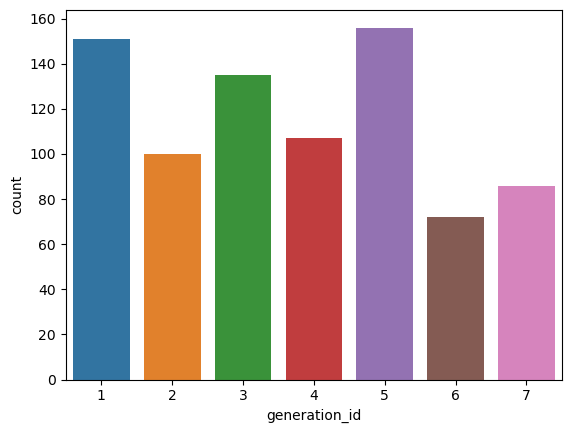

In [6]:
sb.countplot(data = pokemon, x = "generation_id");

**Let's fix a few things**

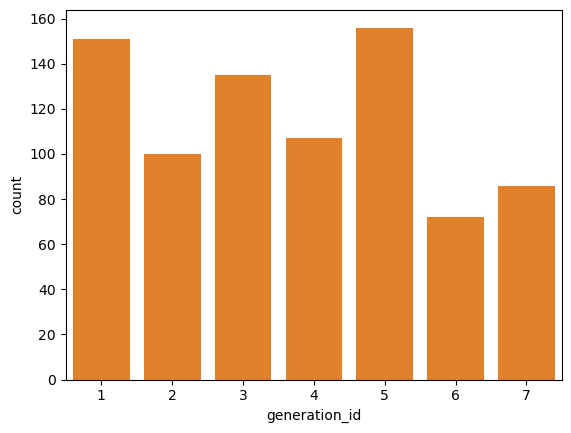

In [7]:
sb.countplot(data = pokemon, x = "generation_id", color = base_color);

In [8]:
pokemon.generation_id.value_counts()

generation_id
5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: count, dtype: int64

In [9]:
Order_ID = list(pokemon.generation_id.value_counts().index)
Order_ID

[5, 1, 3, 4, 2, 7, 6]

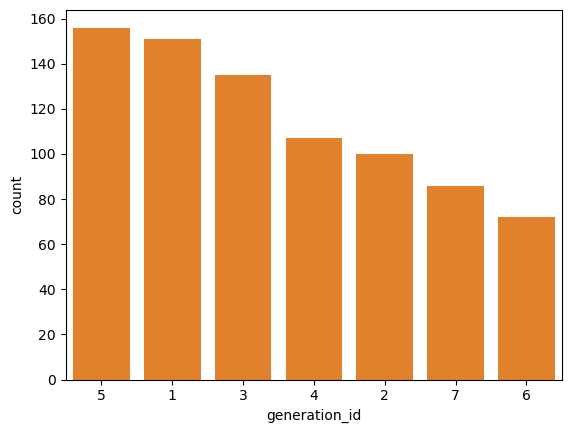

In [10]:
sb.countplot(data = pokemon, x = "generation_id", color = base_color, order = Order_ID);

**Since our column is Norminal** 

## Let's check out matplotlib

In [11]:
x = pokemon["generation_id"].unique()

y = pokemon["generation_id"].value_counts(sort = False)

In [12]:
x, y

(array([1, 2, 3, 4, 5, 6, 7]),
 generation_id
 1    151
 2    100
 3    135
 4    107
 5    156
 6     72
 7     86
 Name: count, dtype: int64)

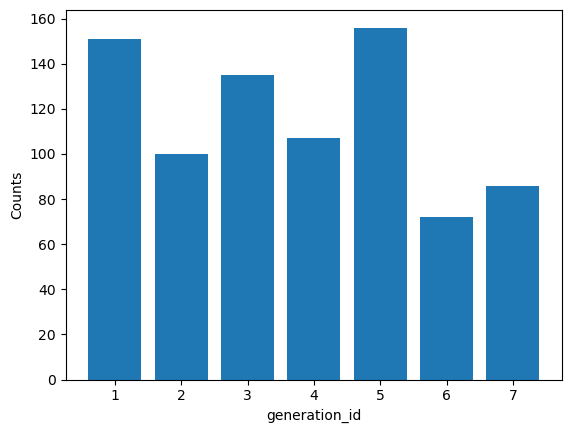

In [13]:
plt.bar(x, y)

plt.xlabel("generation_id")
plt.ylabel("Counts");

## Let's use another column 

In [14]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [15]:
pokemon.type_1.dtype

dtype('O')

<Axes: xlabel='type_1', ylabel='count'>

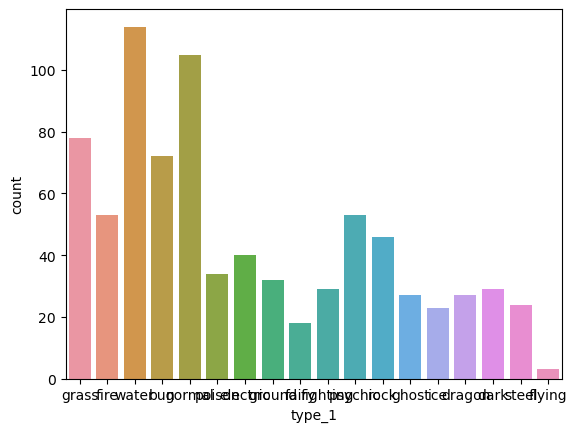

In [16]:
sb.countplot(data = pokemon, x = "type_1")

**Let's clean it up abit**

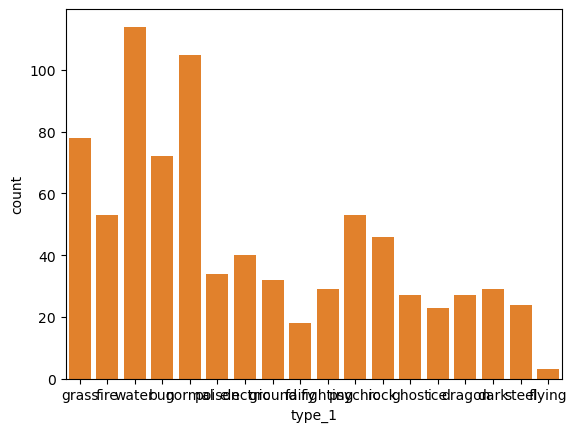

In [17]:
sb.countplot(data = pokemon, x = "type_1", color = base_color);

In [18]:
pokemon.type_1.value_counts()

type_1
water       114
normal      105
grass        78
bug          72
fire         53
psychic      53
rock         46
electric     40
poison       34
ground       32
dark         29
fighting     29
ghost        27
dragon       27
steel        24
ice          23
fairy        18
flying        3
Name: count, dtype: int64

In [19]:
Order_type1 = pokemon.type_1.value_counts().index

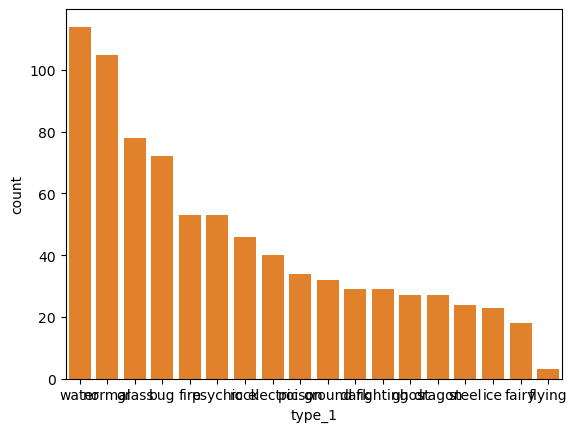

In [20]:
sb.countplot(data = pokemon, x = "type_1", color = base_color, order = Order_type1);

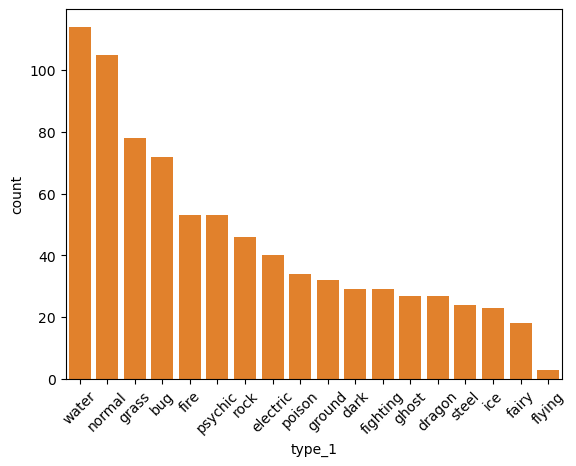

In [21]:
sb.countplot(data = pokemon, x = "type_1", color = base_color, order = Order_type1)

plt.xticks(rotation = 45);

**What if we change x to y as an argunts in seaborn** 

<Axes: xlabel='count', ylabel='type_1'>

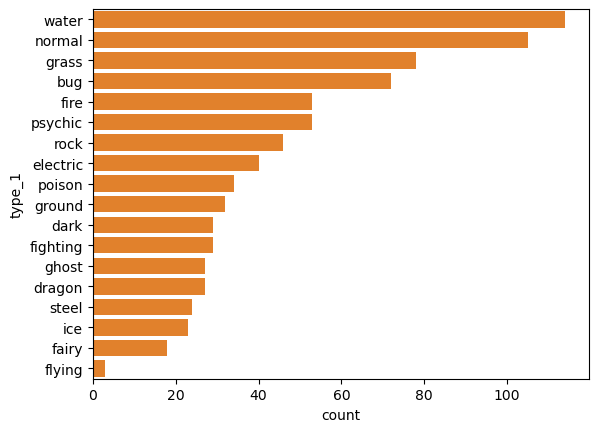

In [22]:
sb.countplot(data = pokemon,  y = "type_1", color = base_color, order = Order_type1)

**Nice we still convay the sam info but we changed out axis**

**It seems that our water and normal pokemon are quite common than flying pokemone**

## Relative vs Absolut Frequency 

In [23]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [24]:
pkm_types = pokemon.melt(id_vars = ['id','species'],
                         value_vars = ["type_1", "type_2"],
                         var_name = "type_levels", value_name = "type")

**Let's see what is going on here**

In [25]:
pkm_types.head()

,id,species,type_levels,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


In [26]:
pkm_types.isnull().sum()

id               0
species          0
type_levels      0
type           402
dtype: int64

In [27]:
pokemon.isnull().sum()

id                   0
species              0
generation_id        0
height               0
weight               0
base_experience      0
type_1               0
type_2             402
hp                   0
attack               0
defense              0
speed                0
special-attack       0
special-defense      0
dtype: int64

**That explains it**

Let's drop the missing values

In [28]:
pkm_types = pkm_types.dropna()

In [29]:
pkm_types.isnull().sum()

id             0
species        0
type_levels    0
type           0
dtype: int64

**Great**

In [30]:
print(f"Original number of observations: {pokemon.shape[0]} or pokemon type df observations {pkm_types.shape[0]}")

Original number of observations: 807 or pokemon type df observations 1212


**Wow we created more observations am not quite sure why seems we have double enteies** 

In [31]:
pkm_types[pkm_types["id"] == 1]

,id,species,type_levels,type
0,1,bulbasaur,type_1,grass
807,1,bulbasaur,type_2,poison


In [32]:
pkm_types[pkm_types["id"] == 2]

,id,species,type_levels,type
1,2,ivysaur,type_1,grass
808,2,ivysaur,type_2,poison


**Now I see it's because of our two columns which are now one new columns they now act like new Identifiers I guess I was new to the melt function**

## More info about melt function on a dataframe

![Cat](To_use.png)

**A little sanity check** 

In [33]:
pokemon.type_1.value_counts()

type_1
water       114
normal      105
grass        78
bug          72
fire         53
psychic      53
rock         46
electric     40
poison       34
ground       32
dark         29
fighting     29
ghost        27
dragon       27
steel        24
ice          23
fairy        18
flying        3
Name: count, dtype: int64

In [34]:
pokemon.type_2.value_counts()

type_2
flying      95
poison      32
ground      32
fairy       29
psychic     29
fighting    25
steel       23
grass       19
dragon      18
water       17
dark        17
ghost       16
rock        14
fire        11
ice         11
electric     8
bug          5
normal       4
Name: count, dtype: int64

**Visuals**

In [35]:
Order_type = pkm_types.type.value_counts().index

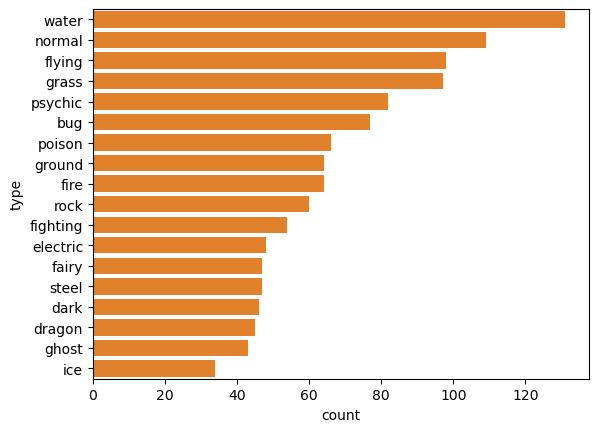

In [36]:
sb.countplot(data = pkm_types, y = "type", color = base_color, order = Order_type);

**Seems like flying just got flying!, significant boost**

# Checking proportions

In [37]:
type_counts = pkm_types.type.value_counts()
Order_type = type_counts.index

max_type = type_counts.iloc[0]
n_Poke = pokemon.shape[0]
max_prop = max_type / n_Poke
max_prop

0.1623296158612144

In [38]:
tick_prop = np.arange(0, max_prop, 0.02)

tick_labes = ["{:.2f}".format(v) for v in tick_prop]

print(tick_prop,">>",tick_labes) 

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16] >> ['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14', '0.16']


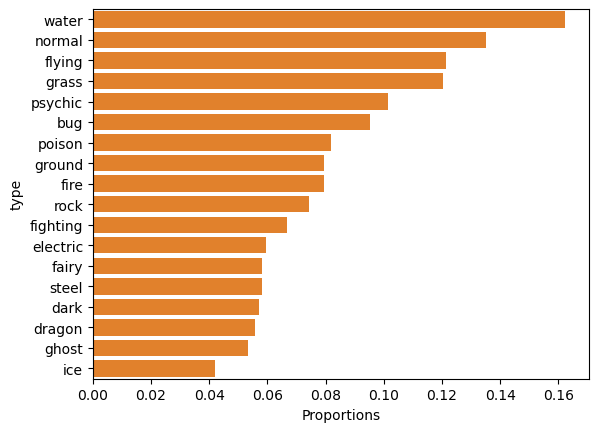

In [39]:
sb.countplot(data = pkm_types, y = "type", color = base_color, order = Order_type)
plt.xticks(tick_prop * n_Poke, tick_labes)
plt.xlabel("Proportions");

**Let's see matplotlib shine with it's felxibility using plt.text()**

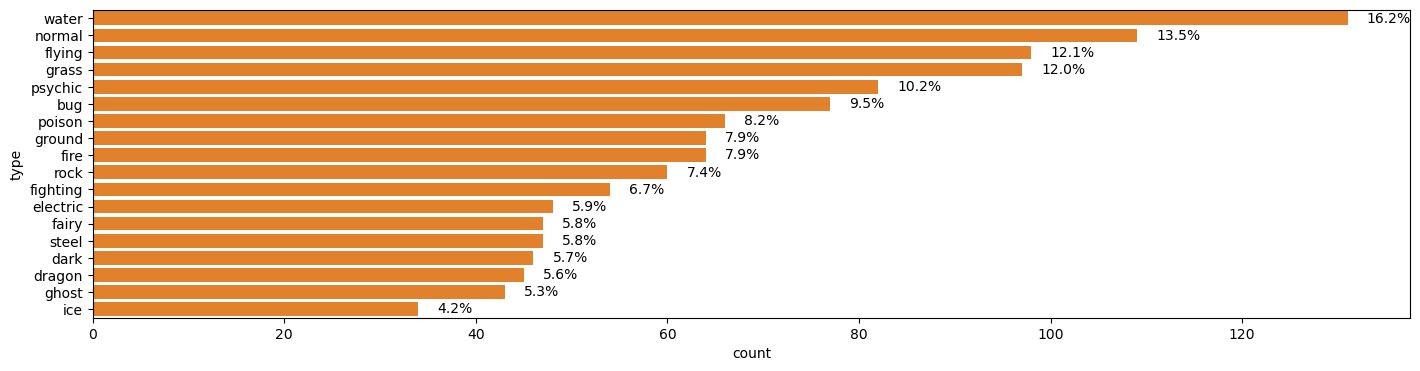

In [40]:
from matplotlib import rcParams

rcParams["figure.figsize"] = 17,4

sb.countplot(data = pkm_types, y = "type", color = base_color, order = Order_type)

for i in range(type_counts.shape[0]):
    counts = type_counts.iloc[i]
    perc_str = "{:.1f}%".format(100*counts / n_Poke)
    plt.text(counts + 2, i, perc_str, va = "center");

**Horizontal Bars**

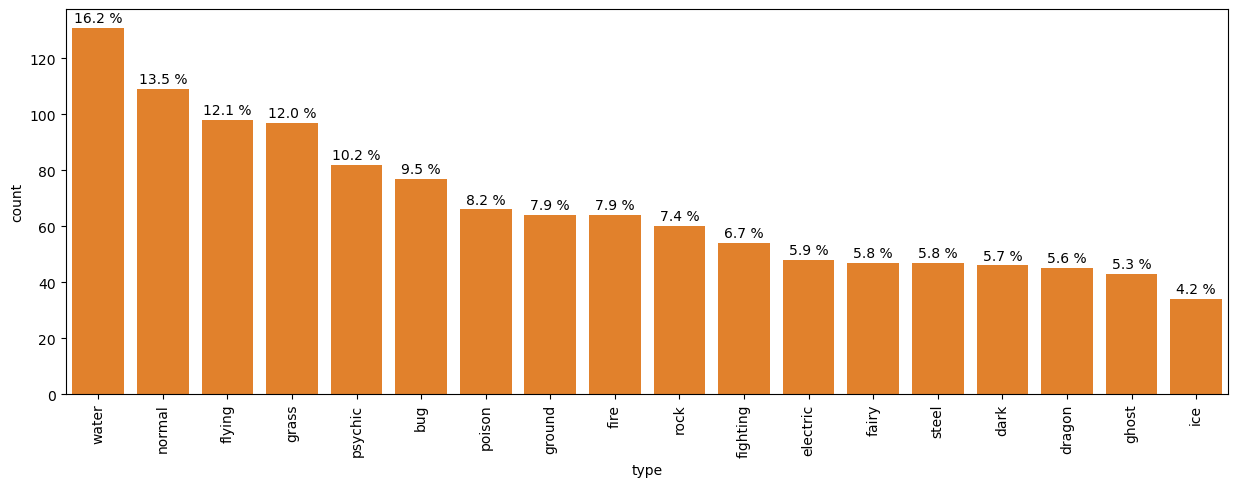

In [41]:
rcParams["figure.figsize"] = 15, 5

sb.countplot(data = pkm_types, x = "type", color = base_color, order = Order_type)

locs, labels = plt.xticks(rotation = 90)
type_counts = pkm_types.type.value_counts()

for loc, label in zip(locs, labels):
    counts = type_counts[label.get_text()]
    perc_str = "{:.1f} %".format(100 * counts/n_Poke)
    plt.text(loc, counts + 2,perc_str, ha = "center", color = "black");